In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [3]:
df=pd.read_csv('USArrests.csv')
df.index= df.iloc[:,0]
df = df.iloc[:,1:5]
del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
scaler = StandardScaler()
df= scaler.fit_transform(df)

In [7]:
agg_küme = AgglomerativeClustering(linkage="complete", affinity= 'cosine', n_clusters = 3)

kümeler = agg_küme.fit_predict(df)

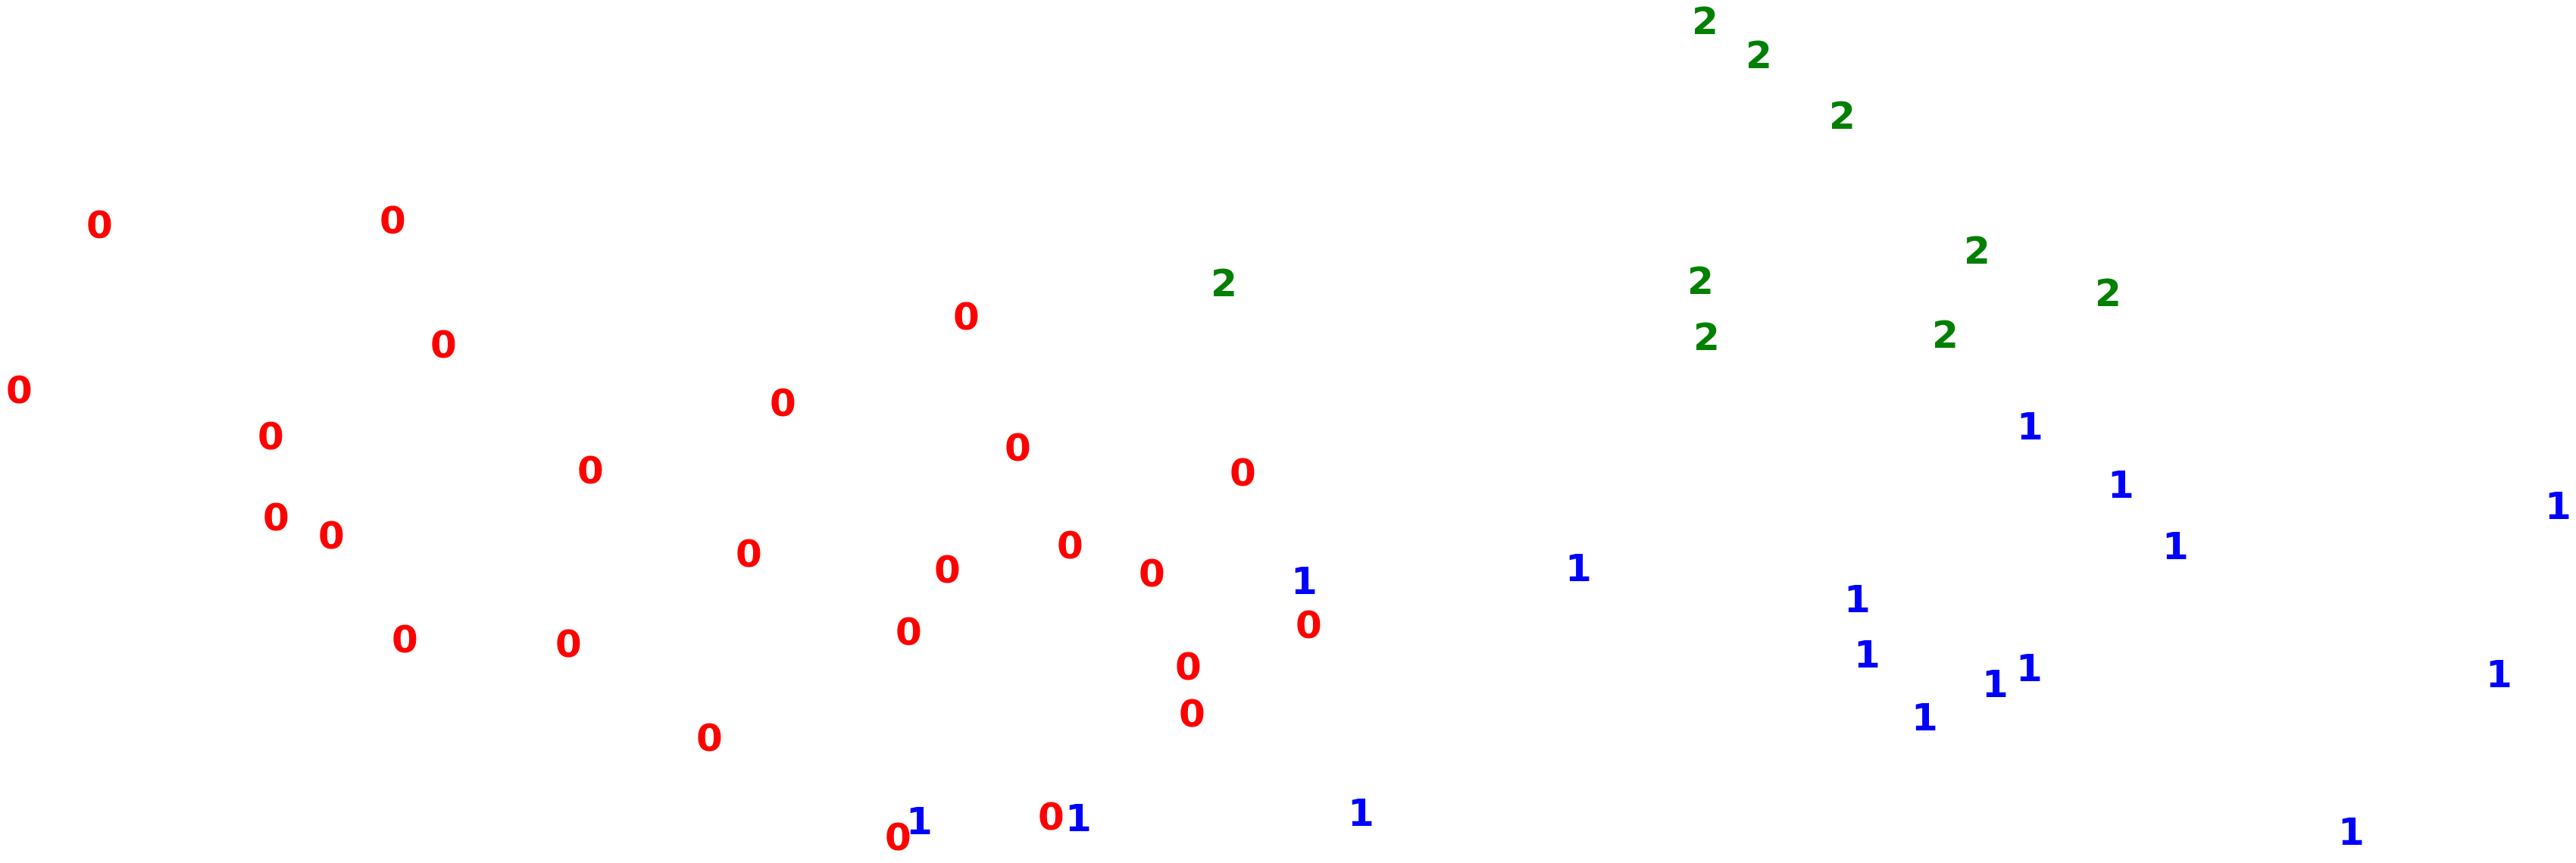

In [12]:
pca = PCA(n_components=2).fit_transform(df)

plt.figure(figsize=(10,5))
colors= 'rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(kümeler[i]),
    color = colors[kümeler[i]],
    fontdict= {'weight':"bold","size":50})
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [17]:
print("The silhoutte score of the Agglomerative Clustering solution : {}".format(metrics.silhouette_score(df, kümeler, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution : 0.3198469604542809


In [18]:
print("The silhoutte score of the Agglomerative Clustering solution : {}".format(metrics.silhouette_score(df, kümeler, metric='cosine')))

The silhoutte score of the Agglomerative Clustering solution : 0.481077674935018


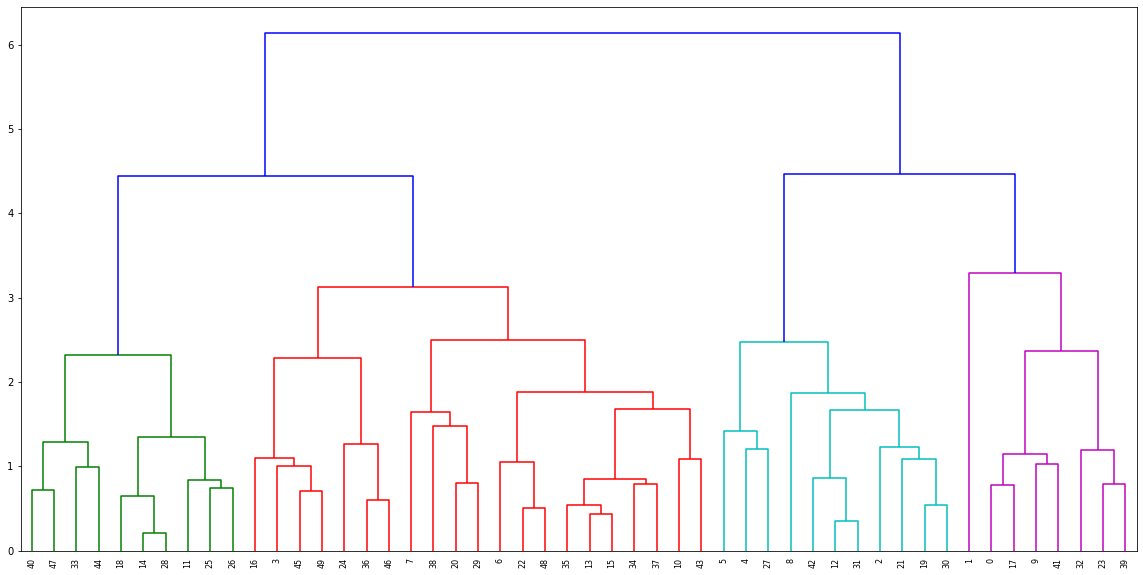

In [19]:
plt.figure(figsize=(20,10))
dendrogram(linkage( df , method= 'complete')) 
plt.show()

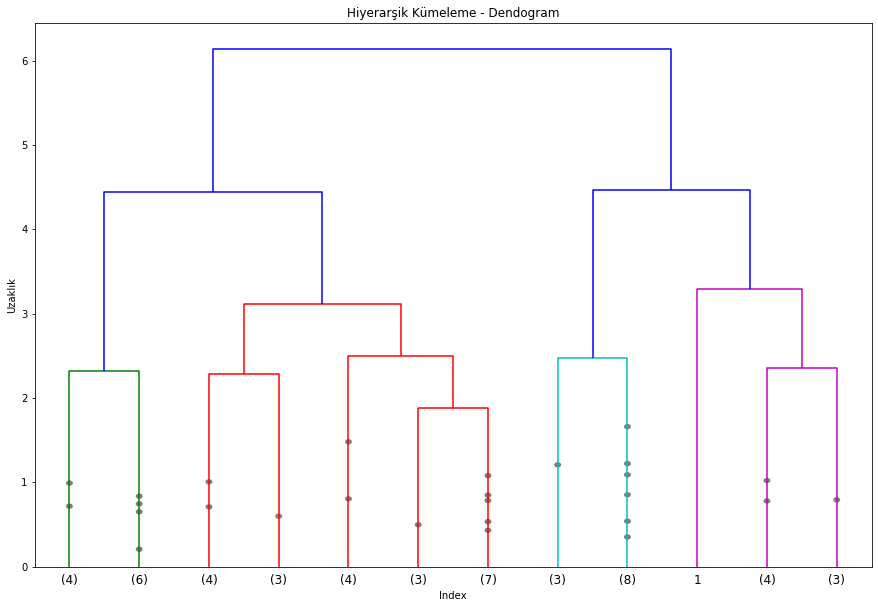

In [20]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Index")
plt.ylabel('Uzaklık')

dendrogram(linkage( X_std , method= 'complete'), truncate_mode="lastp", p=12, show_contracted=True );

# Linkage= 'ward' method using.

In [21]:
agg_küme = AgglomerativeClustering(linkage="ward", affinity= 'euclidean', n_clusters = 3)

kümeler = agg_küme.fit_predict(df)

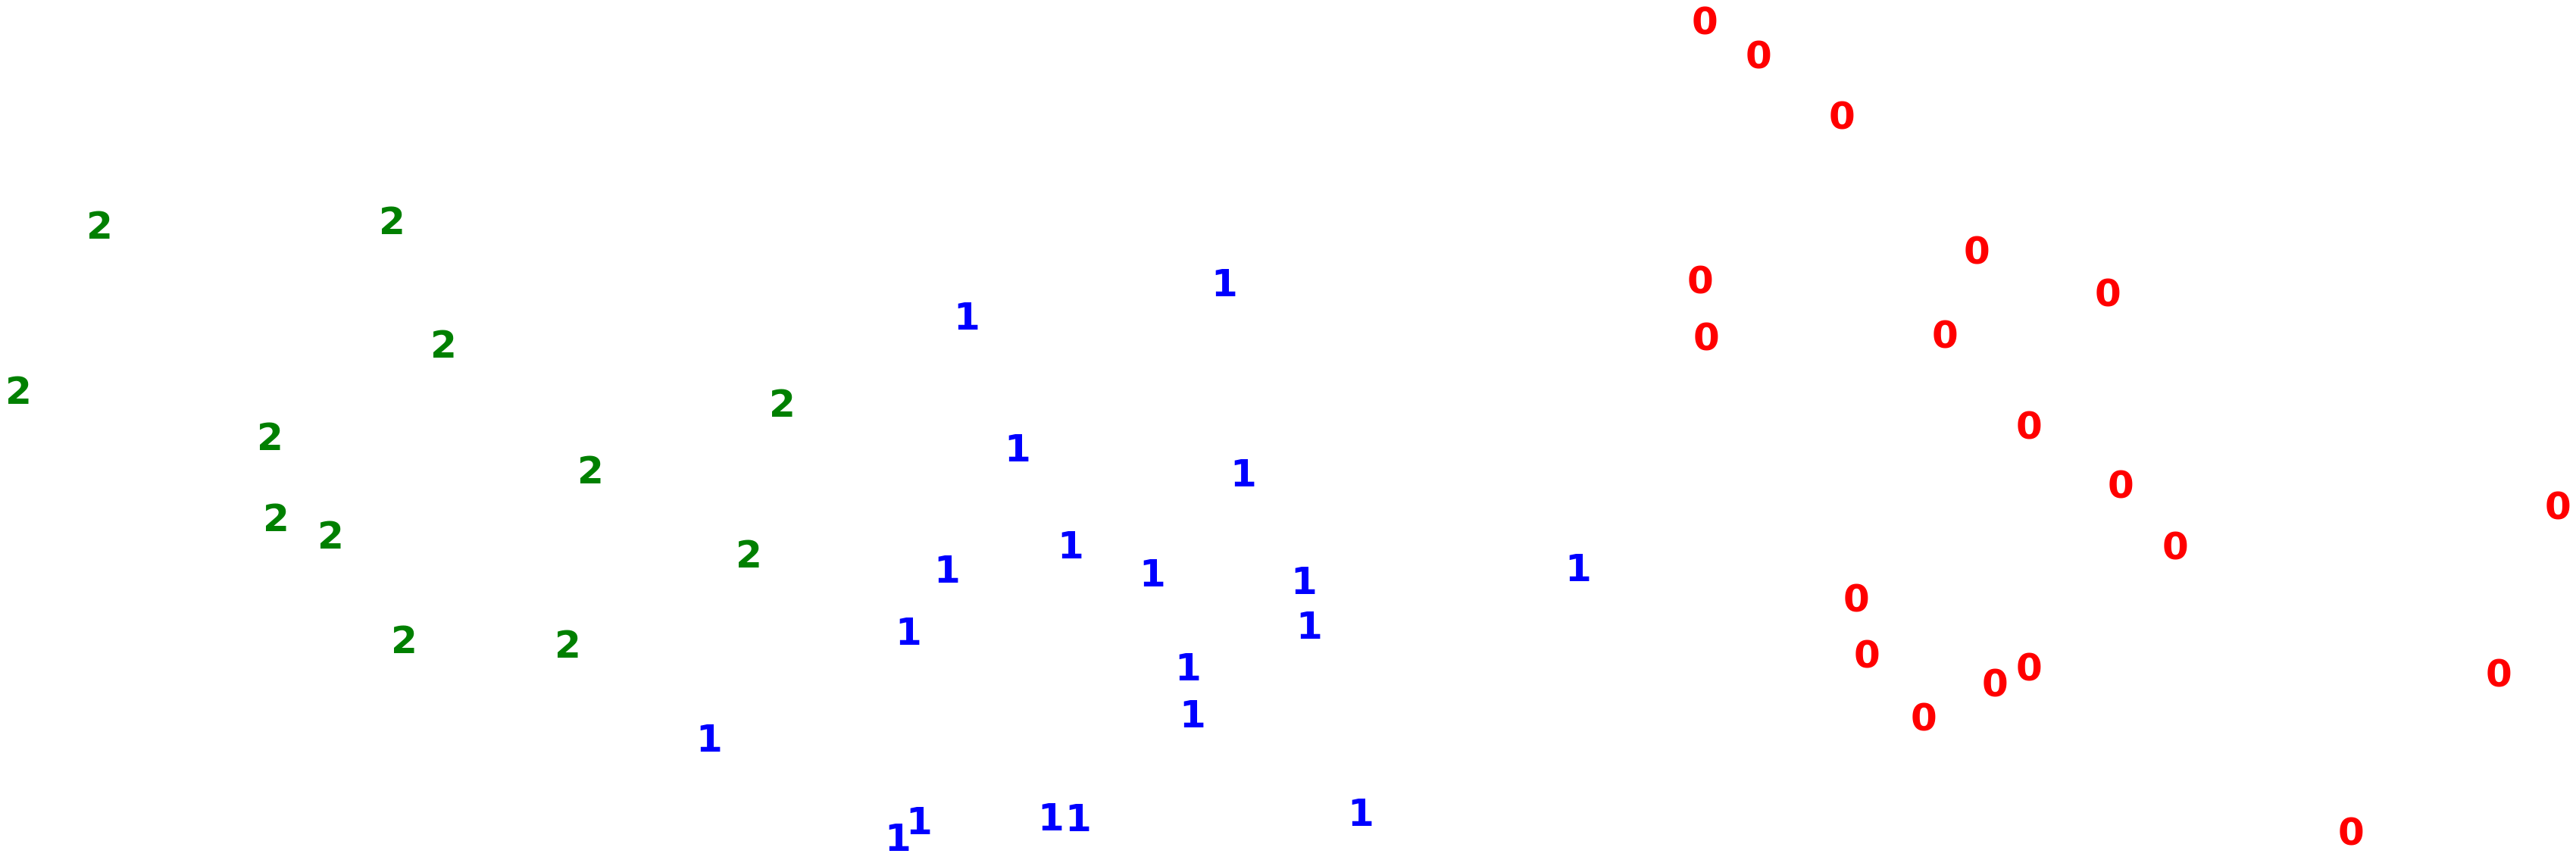

In [24]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors= 'rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(kümeler[i]),
    color = colors[kümeler[i]],
    fontdict= {'weight':"bold","size":50})
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [28]:
print("The silhoutte score of the Agglomerative Clustering solution : {}".format(metrics.silhouette_score(X_std, kümeler, metric='cosine')))

The silhoutte score of the Agglomerative Clustering solution : 0.3852539885334369
